# 🧪 PART 2: Predicting Hospital Readmission Risk with Logistic Regression

**Course**: COMP3037 Introduction to AI  
**Instructor**: Ross Bigelow  
**Objective**: Learn how to build and evaluate a binary classification model using logistic regression.

In this lab, you'll build a binary classification model to predict whether a patient will be readmitted to the hospital. We'll use logistic regression — a foundational ML algorithm — and simulate a dataset inspired by Canadian healthcare data.

You'll learn to:
- Preprocess categorical and numerical features
- Train and evaluate a logistic regression model
- Interpret accuracy, precision, recall, and confusion matrices

In [41]:
from datetime import datetime
# import numpy as np
# np.random.seed()
n=50
print(np.random.randint(1, 10, size=n))

[8 7 7 8 9 4 1 4 9 7 5 1 6 9 8 4 5 3 8 6 6 8 8 2 6 7 8 8 9 1 6 8 5 9 7 9 6
 1 2 3 4 8 5 5 9 5 5 1 1 4]


In [42]:
# 📦 Setup and Data Simulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Simulate dataset
np.random.seed()
n = 1000
df = pd.DataFrame({
    'Age': np.random.randint(18, 90, size=n),
    'Length_of_Stay': np.random.randint(1, 30, size=n),
    'Diagnosis_Type': np.random.choice(['Cardiac', 'Respiratory', 'Orthopedic', 'Neurological'], size=n),
    'Discharge_Disposition': np.random.choice(['Home', 'Rehab', 'Nursing Home'], size=n),
    'Readmitted': np.random.choice([0, 1], size=n, p=[0.7, 0.3])
})

df.head()

,Age,Length_of_Stay,Diagnosis_Type,Discharge_Disposition,Readmitted
0,69,10,Respiratory,Home,0
1,53,22,Cardiac,Home,0
2,50,13,Cardiac,Rehab,0
3,30,2,Cardiac,Nursing Home,0
4,36,2,Cardiac,Home,0


## 🧹 Data Preprocessing
We use one-hot encoding to convert categorical variables into numeric format. This allows logistic regression to interpret them properly.

In [43]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Diagnosis_Type', 'Discharge_Disposition'], drop_first=True)

# Define features and target
X = df_encoded.drop('Readmitted', axis=1)
y = df_encoded['Readmitted']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🧠 Model Training

In [44]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 📊 Evaluation
The confusion matrix shows how many predictions were correct or incorrect. Precision and recall help us understand how well the model identifies readmissions.

## 📊 Confusion Matrix Structure

|                      | Predicted Normal | Predicted Anomaly |
|----------------------|------------------|-------------------|
| **Actual Normal**    | True Negative (TN) | False Positive (FP) |
| **Actual Anomaly**   | False Negative (FN) | True Positive (TP) |

---

- **True Positive (TP)**: Model correctly predicts an anomaly.  
- **True Negative (TN)**: Model correctly predicts normal traffic.  
- **False Positive (FP)**: Model incorrectly flags normal traffic as anomalous.  
- **False Negative (FN)**: Model misses an actual anomaly.

Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       150
           1       0.00      0.00      0.00        50

    accuracy                           0.75       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.56      0.75      0.64       200



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


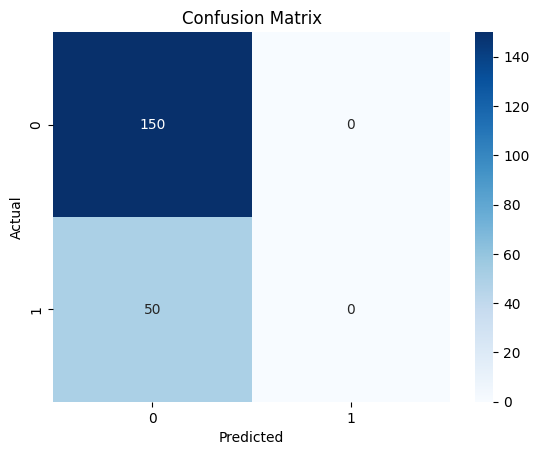

In [45]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#NEW |BLOCK BELOW HERE


from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()



## 🧪 Extension: ROC Curve (Optional)

## 📈 Understanding the ROC Curve

The **ROC Curve** (Receiver Operating Characteristic Curve) is a graphical representation of a classification model’s performance across different threshold settings.

It plots:

- **True Positive Rate (TPR)** on the Y-axis  
- **False Positive Rate (FPR)** on the X-axis

### 📊 Definitions

- **True Positive Rate (TPR)** = Sensitivity =  
  \[
  \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  \]

- **False Positive Rate (FPR)** =  
  \[
  \frac{\text{False Positives}}{\text{False Positives} + \text{True Negatives}}
  \]

### 🧠 How to Interpret the ROC Curve

- A curve closer to the top-left corner indicates a better performing model.
- The diagonal line from (0,0) to (1,1) represents random guessing.
- The **Area Under the Curve (AUC)** quantifies overall performance:
  - AUC = 1.0 → perfect classifier
  - AUC = 0.5 → no better than random
  - AUC < 0.5 → worse than random (model may be inverted)

### ✅ Use Cases

- Comparing multiple classifiers
- Evaluating models on imbalanced datasets
- Selecting optimal thresholds for decision-making


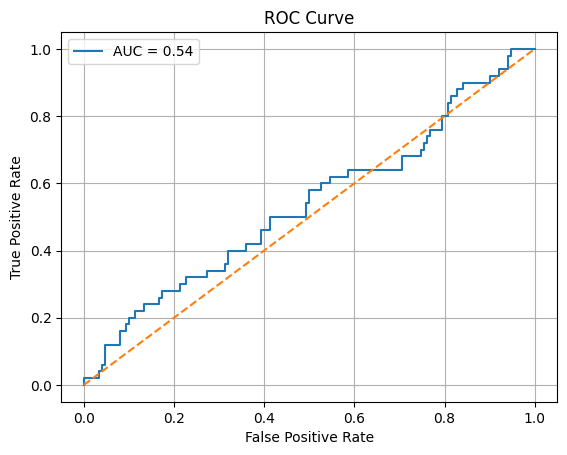

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_probs):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

## 📘 Reflection

1. What features seem most predictive of readmission?
2. How does changing the threshold affect precision and recall?
3. What are the limitations of logistic regression in healthcare contexts?